## Project 3 : Problem statement (Term Deposit Sale)

### Goal 

Building a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio, using the data collected from existing customers.

Historical data for this project is available in file for Banking and Marketing

Bank client data: 
1.	age: Continuous feature 
2.	job: Type of job (management, technician, entrepreneur, blue-collar, etc.) 
3.	marital: marital status (married, single, divorced) 
4.	education: education level (primary, secondary, tertiary) 
5.	default: has credit in default? 
6.	housing: has housing loan? 
7.	loan: has personal loan? 
8.	balance in account 

Related to previous contact: 
9.	contact: contact communication type 
10.	month: last contact month of year 
11.	day: last contact day of the month 
12.	duration: last contact duration, in seconds* 

Other attributes: 
13.	campaign: number of contacts performed during this campaign and for this client 
14.	pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days) 
15.	previous: number of contacts performed before this campaign and for this client 
16.	poutcome: outcome of the previous marketing campaign 

Output variable (desired target): 
17.	Target: Tell us has the client subscribed a term deposit. (Yes, No)



### Import Key Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

### Import Bank Dataset

In [2]:
# Import Bank Dataset (semicolon separated csv file).

BankData = pd.read_csv('e:/pgp03_projects/bank.csv', sep=';')

### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)


### 1.	Univariate analysis (12 marks) 


a.)	Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

### Display Bank Dataset

In [3]:
# Display a few rows(10) of the Bank Dataset
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


### Analyze and Summarize the Main Characteristics of the data - shape, data types & description of the data (independent variables)

In [4]:
# Check Shape or Number & size of Bank Dataset

BankData.shape

(4521, 17)

In [5]:
# Checking the data type of each variable and number of values entered in each of the variables

BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


#### Observation: Some variables are of data type - int, with Categorical variables being of Object data type.

In [6]:
# Display of Summary Statistics for all variales types, both Numeric and Categorical

BankData.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


#### 5-point Summary Analysis

Min age = 19; 
Quartile 1, Q1 = 33; 
Mean (Q2) = 39;
Median = 39; [Mean = Median , hence the data is assymetrical or not skewed
Quartile 3, Q3 = 49; 
Max age = 87; 
IQR (Q3-Q1) = 49-33 = 16;  
Range = 87-19 = 68;
Std Deviation = 10.58; [ Most data, about two-thirds of the data, lies between roughly 29 to about 49

NB : All Numeric variables have similar summary statistics 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002999E7A5240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002999EB919E8>]], dtype=object)

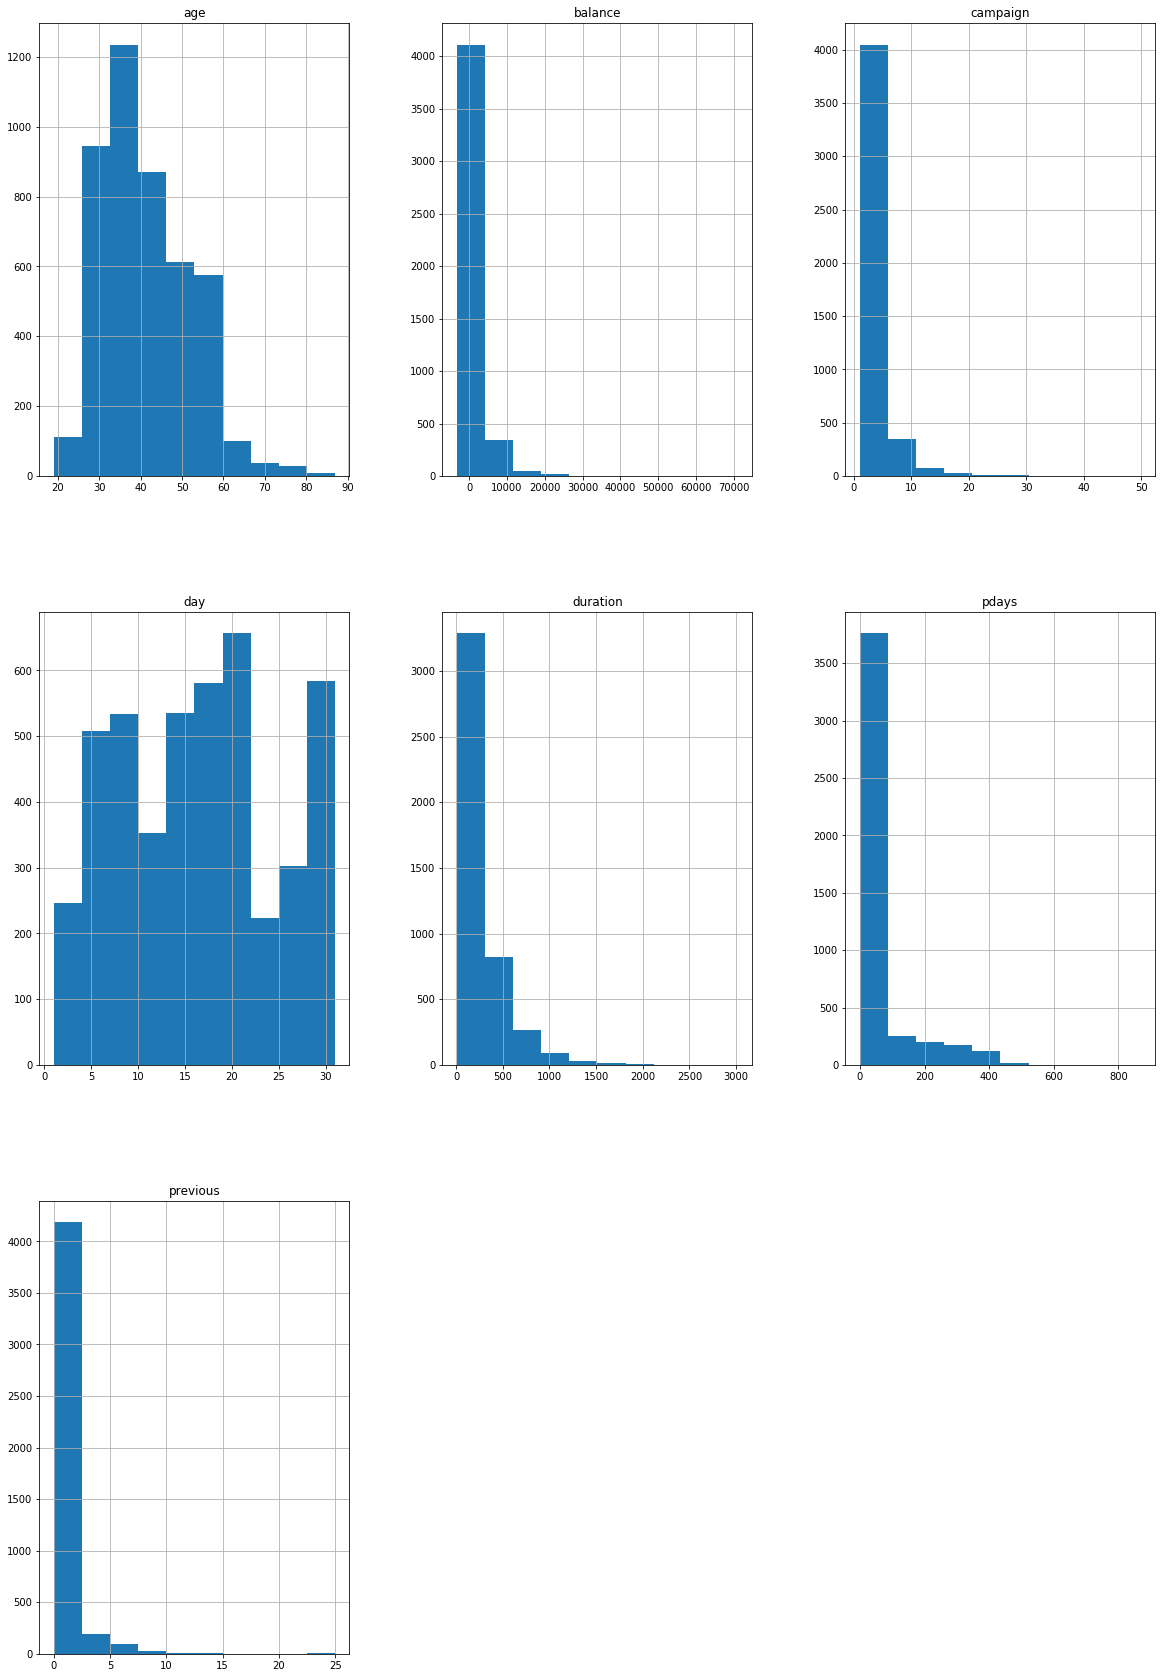

In [7]:
# Visualizing Summary Statistics of the Bank data distribution

import matplotlib.pyplot as plt
%matplotlib inline

BankData.hist(figsize=(20,30))


#### Observation : Most of the variables are skewed to the right, meaning median > mean

1. age, balance, campaign, duration, pdays and days are all right skewed

#### EDA Descriptive Statistics

In [8]:
print ('Data:', BankData.mean())  # Some object type !!!!!

Data: age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64


In [9]:
print ('Data:', BankData.median()) # Some object type !!!!!

Data: age          39.0
balance     444.0
day          16.0
duration    185.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64


#### Apart from Age, day & Campaign period that have mean & median that are close, all the other variables have big disparities 

In [10]:
# Checking the values with th3 highest frequency

print ('Data:', BankData.mode())

Data:    age         job  marital  education default  balance housing loan  \
0   34  management  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   20   may       123         1     -1         0  unknown  no  


#### Values that occur most frequently are as follows:
1. Age = 34
2. Type of Job = "management"
3. Marital = "married"
4. Education = "secondary"
5. Balance = 0 - Most customers/prospective customers have zero balance(s)
6. Housing = "yes" - Most people have own housing
7. Loan = 0 , Most customers do not have personal loans
8. Contact = "cellular" - Most type of communication is 'cellular'


### b.)	Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.

### c.)	Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

#### Finding the number of missing values in the data

In [11]:
# Check and detect anomalies (Missing values)

print(BankData.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


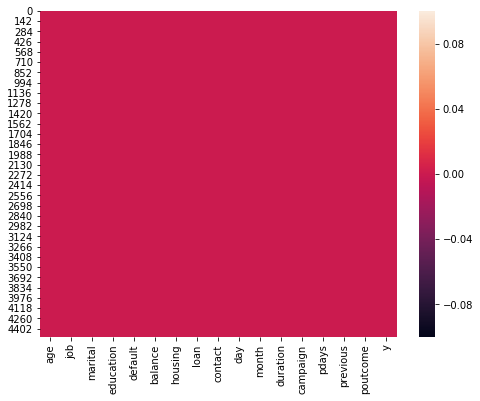

In [12]:
# Check missing values via a heatmap visualization

plt.figure(figsize=(8,6))
sns.heatmap(BankData.isna())
plt.show()

Observation: Heatmap shows outcome of zero color, hence there are no missing values 

In [13]:
# Summary Statistic for numeric values

BankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


#### Observations: 

1. There are no missing values in the rows and columns. All variables have 4521 entries.
2. Some outliers for age are there for all other variables. 
3. There's more skewness at the higher range of data for age, where the difference between Q3 and max is high (49 and 87), as opposed to lower range between Q1 and the min (33 and 19).
4. Minimun for pdays shows -1.0, which is wrong.

In [14]:
BankData.skew()

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

#### Observation: 

1. There is heavy skewing for the following variables - balances, duration, campaign, pdays and previous.
2. 'balances' variable can be ignored to enable us realistic predictive model.


### 2.	Multivariate analysis (8 marks) 


#### a.)	Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. 

#### b.)	Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots 


Visualizing various categorical variables against the numeric variable 'Age'

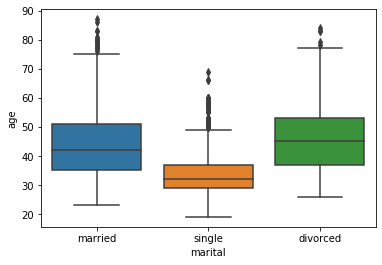

In [15]:
# Visualizing marital status against age and detecting outliers (extremes)

import seaborn as sns
sns.boxplot(x='marital', y='age', data=BankData)

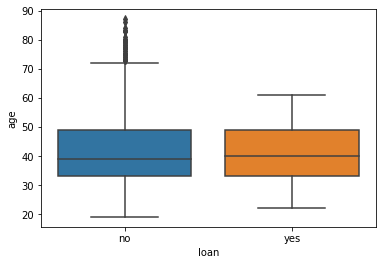

In [16]:
# Visualizing loan against age
sns.boxplot(x='loan', y='age', data=BankData)

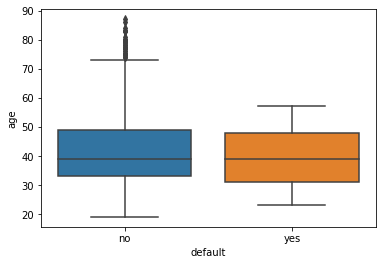

In [17]:
import seaborn as sns
sns.boxplot(x='default', y='age', data=BankData)

#### 5-point summary and Data distribution among various variables
1. Boxplots show distribution between age and appetite for loans, age and marital status, and age and default rate. They seem to be correlated.
2. Boxplots show the 5-point summary showing quartiles (Q1, Q2, Q3) and Mean, IQR and Range.
3. Above boxplots also captures relationships between the various categorical variables and the numeric variable of age.
4. Some outliers can be seen with age against all other variables, particularly on the higher side bank customers' ages.


In [18]:
# Analysing between various categorcal variables

pd.crosstab(BankData['education'], BankData['loan'])

loan,no,yes
education,,
primary,584,94
secondary,1890,416
tertiary,1176,174
unknown,180,7


In [19]:
# Analysing between various categorcal variables

pd.crosstab(BankData['marital'], BankData['loan'])

loan,no,yes
marital,,
divorced,438,90
married,2344,453
single,1048,148


In [20]:
# Analysing between various categorcal variables

pd.crosstab(BankData['housing'], BankData['loan'])

loan,no,yes
housing,,
no,1677,285
yes,2153,406


In [21]:
# Analysing between various categorcal variables

pd.crosstab(BankData['contact'], BankData['loan'])

loan,no,yes
contact,,
cellular,2447,449
telephone,257,44
unknown,1126,198


#### Observation: 
Analysis shows there are fewer people taking loans than those who take loans at each level of education, irrespective of marriage status, type of contact/communication and also irrespective of whether they own their own houses/homes or not.

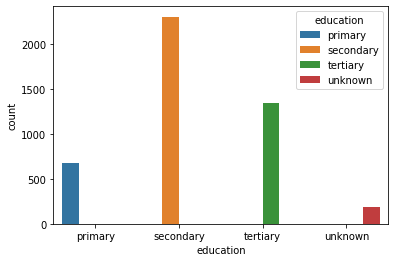

In [22]:
sns.countplot(x='education', hue='education', data=BankData)

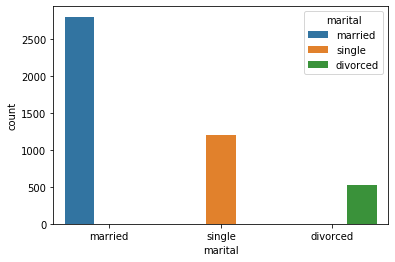

In [23]:
sns.countplot(x='marital', hue='marital', data=BankData)

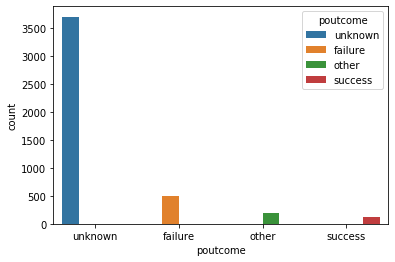

In [24]:
sns.countplot(x='poutcome', hue='poutcome', data=BankData)

#### Observations:
1. Most people with higer eduaction i.e. secondary and tertiary are likely to take loans.
2. Most married people are likely to take loans, and divorsed people are the least likely to take loans.
3. Currently there is a very low uptake of loans, with a large number of unknown outcomes from the customer, which can be explored through Marketing camapaigns.

In [25]:
# Analysis of different qualitatitive variables through different axis using pivot tables

pd.pivot_table(BankData, index=['marital', 'education'],
                        columns=['loan'], aggfunc=len)

age        balance        campaign        contact  \
loan                    no    yes      no    yes       no    yes      no   
marital  education                                                         
divorced primary      70.0    9.0    70.0    9.0     70.0    9.0    70.0   
         secondary   219.0   51.0   219.0   51.0    219.0   51.0   219.0   
         tertiary    125.0   30.0   125.0   30.0    125.0   30.0   125.0   
         unknown      24.0    NaN    24.0    NaN     24.0    NaN    24.0   
married  primary     451.0   75.0   451.0   75.0    451.0   75.0   451.0   
         secondary  1154.0  273.0  1154.0  273.0   1154.0  273.0  1154.0   
         tertiary    627.0  100.0   627.0  100.0    627.0  100.0   627.0   
         unknown     112.0    5.0   112.0    5.0    112.0    5.0   112.0   
single   primary      63.0   10.0    63.0   10.0     63.0   10.0    63.0   
         secondary   517.0   92.0   517.0   92.0    517.0   92.0   517.0   
         tertiary    424.0   44.0   424.0   44.0    424.0   44.0   424.0   
         unknown      44.0    2.0    44.0    2.0     44.0    2.0    44.0   

                              day         ...   month          pdays         \
loan                  yes      no    yes  ...      no    yes      no    yes   
marital  education                        ...                                 
divorced primary      9.0    70.0    9.0  ...    70.0    9.0    70.0    9.0   
         secondary   51.0   219.0   51.0  ...   219.0   51.0   219.0   51.0   
         tertiary    30.0   125.0   30.0  ...   125.0   30.0   125.0   30.0   
         unknown      NaN    24.0    NaN  ...    24.0    NaN    24.0    NaN   
married  primary     75.0   451.0   75.0  ...   451.0   75.0   451.0   75.0   
         secondary  273.0  1154.0  273.0  ...  1154.0  273.0  1154.0  273.0   
         tertiary   100.0   627.0  100.0  ...   627.0  100.0   627.0  100.0   
         unknown      5.0   112.0    5.0  ...   112.0    5.0   112.0    5.0   
single   primary     10.0    63.0   10.0  ...    63.0   10.0    63.0   10.0   
         secondary   92.0   517.0   92.0  ...   517.0   92.0   517.0   92.0   
         tertiary    44.0   424.0   44.0  ...   424.0   44.0   424.0   44.0   
         unknown      2.0    44.0    2.0  ...    44.0    2.0    44.0    2.0   

                   poutcome        previous              y         
loan                     no    yes       no    yes      no    yes  
marital  education                                                 
divorced primary       70.0    9.0     70.0    9.0    70.0    9.0  
         secondary    219.0   51.0    219.0   51.0   219.0   51.0  
         tertiary     125.0   30.0    125.0   30.0   125.0   30.0  
         unknown       24.0    NaN     24.0    NaN    24.0    NaN  
married  primary      451.0   75.0    451.0   75.0   451.0   75.0  
         secondary   1154.0  273.0   1154.0  273.0  1154.0  273.0  
         tertiary     627.0  100.0    627.0  100.0   627.0  100.0  
         unknown      112.0    5.0    112.0    5.0   112.0    5.0  
single   primary       63.0   10.0     63.0   10.0    63.0   10.0  
         secondary    517.0   92.0    517.0   92.0   517.0   92.0  
         tertiary     424.0   44.0    424.0   44.0   424.0   44.0  
         unknown       44.0    2.0     44.0    2.0    44.0    2.0  

[12 rows x 28 columns]

In [26]:
pd.pivot_table(BankData, index=['education', 'marital'],
                        columns=['loan'], aggfunc=len)

age        balance        campaign        contact  \
loan                    no    yes      no    yes       no    yes      no   
education marital                                                          
primary   divorced    70.0    9.0    70.0    9.0     70.0    9.0    70.0   
          married    451.0   75.0   451.0   75.0    451.0   75.0   451.0   
          single      63.0   10.0    63.0   10.0     63.0   10.0    63.0   
secondary divorced   219.0   51.0   219.0   51.0    219.0   51.0   219.0   
          married   1154.0  273.0  1154.0  273.0   1154.0  273.0  1154.0   
          single     517.0   92.0   517.0   92.0    517.0   92.0   517.0   
tertiary  divorced   125.0   30.0   125.0   30.0    125.0   30.0   125.0   
          married    627.0  100.0   627.0  100.0    627.0  100.0   627.0   
          single     424.0   44.0   424.0   44.0    424.0   44.0   424.0   
unknown   divorced    24.0    NaN    24.0    NaN     24.0    NaN    24.0   
          married    112.0    5.0   112.0    5.0    112.0    5.0   112.0   
          single      44.0    2.0    44.0    2.0     44.0    2.0    44.0   

                              day         ...   month          pdays         \
loan                  yes      no    yes  ...      no    yes      no    yes   
education marital                         ...                                 
primary   divorced    9.0    70.0    9.0  ...    70.0    9.0    70.0    9.0   
          married    75.0   451.0   75.0  ...   451.0   75.0   451.0   75.0   
          single     10.0    63.0   10.0  ...    63.0   10.0    63.0   10.0   
secondary divorced   51.0   219.0   51.0  ...   219.0   51.0   219.0   51.0   
          married   273.0  1154.0  273.0  ...  1154.0  273.0  1154.0  273.0   
          single     92.0   517.0   92.0  ...   517.0   92.0   517.0   92.0   
tertiary  divorced   30.0   125.0   30.0  ...   125.0   30.0   125.0   30.0   
          married   100.0   627.0  100.0  ...   627.0  100.0   627.0  100.0   
          single     44.0   424.0   44.0  ...   424.0   44.0   424.0   44.0   
unknown   divorced    NaN    24.0    NaN  ...    24.0    NaN    24.0    NaN   
          married     5.0   112.0    5.0  ...   112.0    5.0   112.0    5.0   
          single      2.0    44.0    2.0  ...    44.0    2.0    44.0    2.0   

                   poutcome        previous              y         
loan                     no    yes       no    yes      no    yes  
education marital                                                  
primary   divorced     70.0    9.0     70.0    9.0    70.0    9.0  
          married     451.0   75.0    451.0   75.0   451.0   75.0  
          single       63.0   10.0     63.0   10.0    63.0   10.0  
secondary divorced    219.0   51.0    219.0   51.0   219.0   51.0  
          married    1154.0  273.0   1154.0  273.0  1154.0  273.0  
          single      517.0   92.0    517.0   92.0   517.0   92.0  
tertiary  divorced    125.0   30.0    125.0   30.0   125.0   30.0  
          married     627.0  100.0    627.0  100.0   627.0  100.0  
          single      424.0   44.0    424.0   44.0   424.0   44.0  
unknown   divorced     24.0    NaN     24.0    NaN    24.0    NaN  
          married     112.0    5.0    112.0    5.0   112.0    5.0  
          single       44.0    2.0     44.0    2.0    44.0    2.0  

[12 rows x 28 columns]

In [27]:
pd.pivot_table(BankData, index=['housing', 'marital'],
                        columns=['education'], aggfunc=len)

age                            balance            \
education        primary secondary tertiary unknown primary secondary   
housing marital                                                         
no      divorced      40       106       76       8      40       106   
        married      230       507      367      68     230       507   
        single        25       263      244      28      25       263   
yes     divorced      39       164       79      16      39       164   
        married      296       920      360      49     296       920   
        single        48       346      224      18      48       346   

                                  campaign            ... poutcome          \
education        tertiary unknown  primary secondary  ... tertiary unknown   
housing marital                                       ...                    
no      divorced       76       8       40       106  ...       76       8   
        married       367      68      230       507  ...      367      68   
        single        244      28       25       263  ...      244      28   
yes     divorced       79      16       39       164  ...       79      16   
        married       360      49      296       920  ...      360      49   
        single        224      18       48       346  ...      224      18   

                 previous                                  y            \
education         primary secondary tertiary unknown primary secondary   
housing marital                                                          
no      divorced       40       106       76       8      40       106   
        married       230       507      367      68     230       507   
        single         25       263      244      28      25       263   
yes     divorced       39       164       79      16      39       164   
        married       296       920      360      49     296       920   
        single         48       346      224      18      48       346   

                                   
education        tertiary unknown  
housing marital                    
no      divorced       76       8  
        married       367      68  
        single        244      28  
yes     divorced       79      16  
        married       360      49  
        single        224      18  

[6 rows x 56 columns]

In [28]:
pd.pivot_table(BankData, index=['marital', 'housing'],
                        columns=['education'], aggfunc=len)

age                            balance            \
education        primary secondary tertiary unknown primary secondary   
marital  housing                                                        
divorced no           40       106       76       8      40       106   
         yes          39       164       79      16      39       164   
married  no          230       507      367      68     230       507   
         yes         296       920      360      49     296       920   
single   no           25       263      244      28      25       263   
         yes          48       346      224      18      48       346   

                                  campaign            ... poutcome          \
education        tertiary unknown  primary secondary  ... tertiary unknown   
marital  housing                                      ...                    
divorced no            76       8       40       106  ...       76       8   
         yes           79      16       39       164  ...       79      16   
married  no           367      68      230       507  ...      367      68   
         yes          360      49      296       920  ...      360      49   
single   no           244      28       25       263  ...      244      28   
         yes          224      18       48       346  ...      224      18   

                 previous                                  y            \
education         primary secondary tertiary unknown primary secondary   
marital  housing                                                         
divorced no            40       106       76       8      40       106   
         yes           39       164       79      16      39       164   
married  no           230       507      367      68     230       507   
         yes          296       920      360      49     296       920   
single   no            25       263      244      28      25       263   
         yes           48       346      224      18      48       346   

                                   
education        tertiary unknown  
marital  housing                   
divorced no            76       8  
         yes           79      16  
married  no           367      68  
         yes          360      49  
single   no           244      28  
         yes          224      18  

[6 rows x 56 columns]

In [29]:
# Check correlation graphically

def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


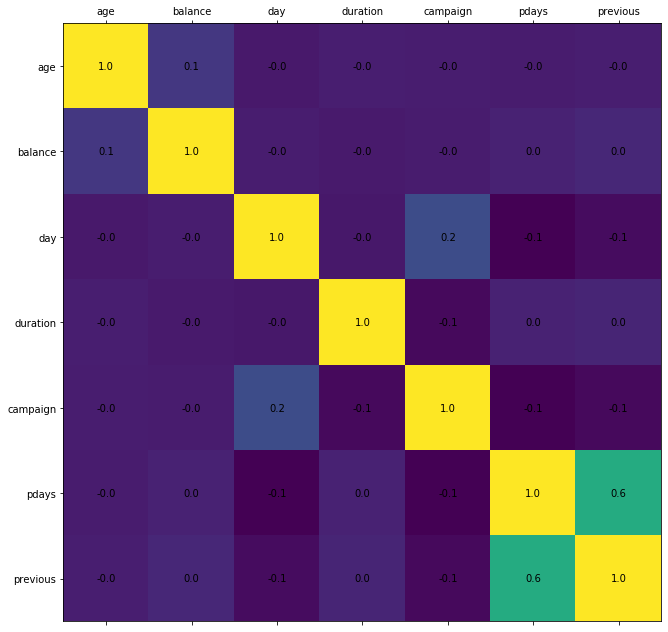

In [30]:
plot_corr(BankData)

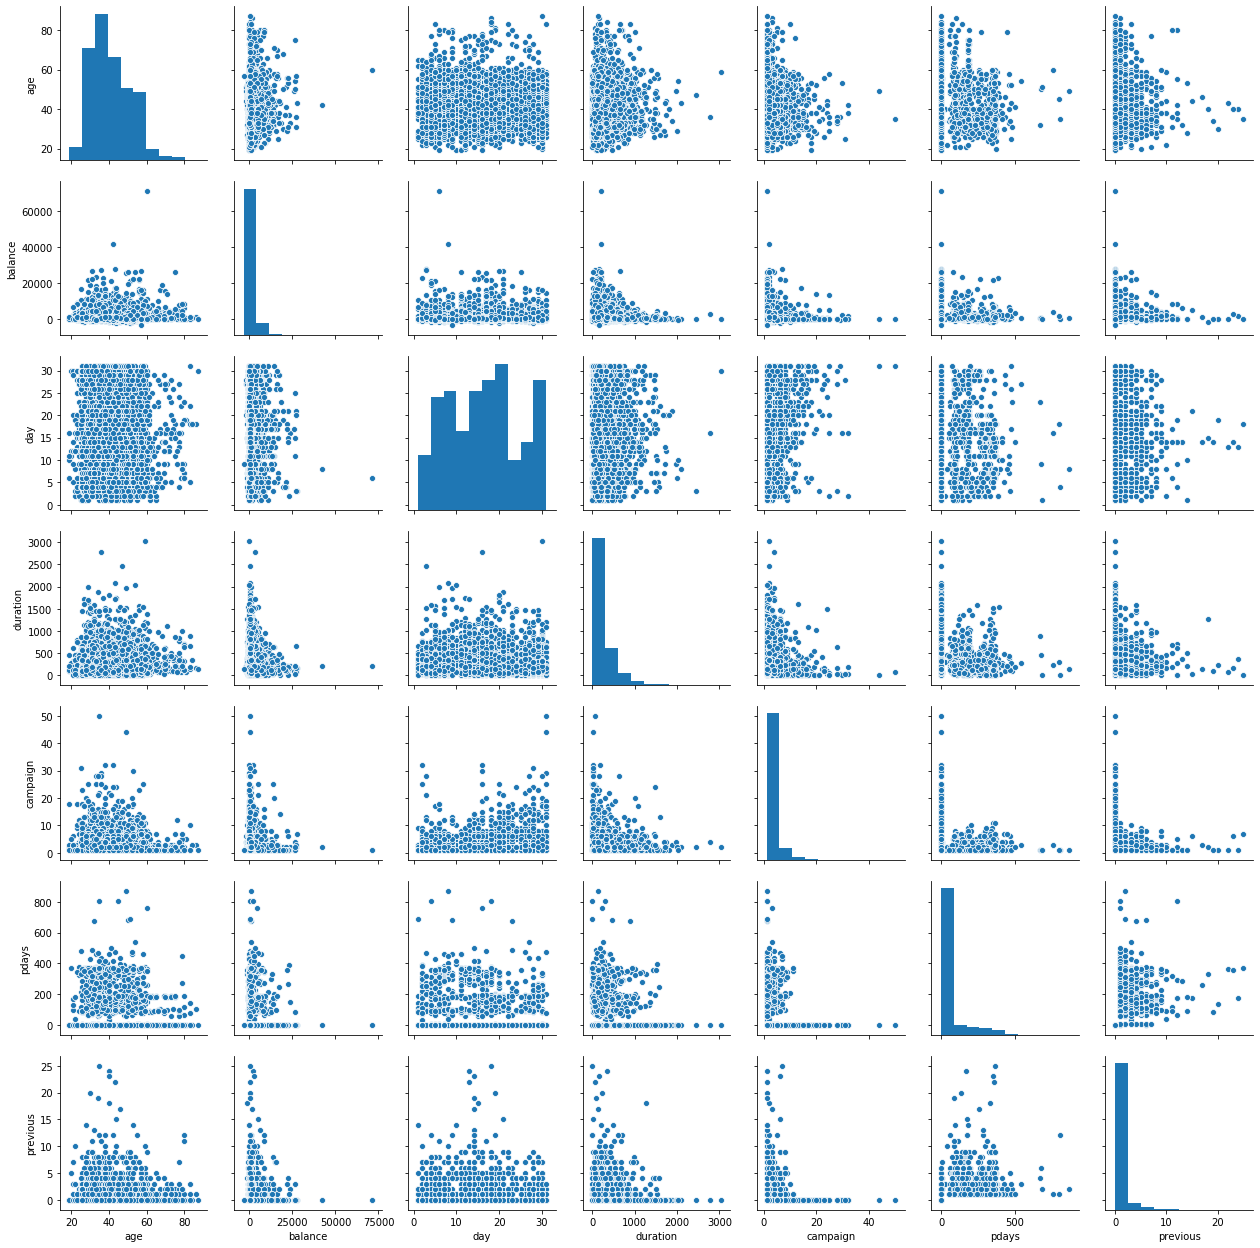

In [31]:
# Summarizing many characteristics of many of the data variables and finding patterns in the data using scatter plots in visualization

sns.pairplot (BankData)

#### Important attributes that bank needs to consider when they give loans are 

1. 'Marital Status', 'Education', 'Housing', 'loan = having a current loan', 'balance of loan' and 'previous' are important attributes for consideration of the loan.
2. Visualization shows very low correlations between the variables

### Deliverable – 2 (Prepare the data for analytics) – (10)

### 1.	Ensure the attribute types are correct. If not, take appropriate actions.

In [32]:
BankData.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


Many columns [ job, marital, education, default, housing, loan, contact, poutcome ] are of type object i.e. strings. These need to be converted to ordinal type

In [33]:
# Convert variables with object type (categorical strings) into type integer

for feature in BankData.columns:                               # Loop through all columns in the dataframe
    if BankData[feature].dtype == 'object':                    # Only apply for columns with categorical strings
        BankData[feature] = pd.Categorical(BankData[feature])  # Replace strings with an integer
BankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [34]:
# Check change of datatype from object to categorical datatypes

BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null category
marital      4521 non-null category
education    4521 non-null category
default      4521 non-null category
balance      4521 non-null int64
housing      4521 non-null category
loan         4521 non-null category
contact      4521 non-null category
day          4521 non-null int64
month        4521 non-null category
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null category
y            4521 non-null category
dtypes: category(10), int64(7)
memory usage: 293.2 KB


In [35]:
# Count the categorical variables to be converted

print(BankData.job.value_counts())
print(BankData.marital.value_counts())
print(BankData.education.value_counts())
print(BankData.default.value_counts())
print(BankData.housing.value_counts())
print(BankData.loan.value_counts())
print(BankData.contact.value_counts())
print(BankData.month.value_counts())
print(BankData.poutcome.value_counts())


management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [36]:
# Create a Structure for replacing values in variables with categorical values
# Create a Structure for categorical variables

replaceStruct = {
                "job":     {"admin.": 1, "blue-collar": 2 ,"entrepreneur": 3 ,"housemaid":4, "management": 5, "retired": 6 ,"self-employed": 7 ,"housemaid":8, "services": 9, "student": 10 ,"technician": 11 ,"unemployed":12, "unknown": 13},
                "marital": {"single": 1, "married":2 , "divorced": 3},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": 4},
                "default":     {"no": 0, "yes": 1},    # Include 'unknown' with complete bank data set
                "housing":     {"no": 0, "yes": 1},
                "loan":     {"no": 0, "yes": 1},
                "month":     {"jan": 1, "feb": 2 ,"mar": 3 ,"apr":4, "may": 5, "jun": 6 ,"jul": 7 ,"aug":8, "sep": 9, "oct": 10 ,"nov": 11 ,"dec":12},    
#                "contact": {"cellular": 1, "telephone":2 , "unknown": 3},
#                "poutcome":     {"success": 1, "failure": 2 ,"other": 3 ,"unknown": 4},
                "y":     {"no": 0, "yes": 1},    
                    }
oneHotCols=["contact","poutcome"] # Use One Hot Encoding to create multiple columns (or Dummy Variables) for these two variables of 'contact' & 'poutcome'


In [37]:
#  Run and replace categorical values with numerical variables. And create Dummy variables

BankData=BankData.replace(replaceStruct)
BankData=pd.get_dummies(BankData, columns=oneHotCols)
BankData.head(10)


,age,job,marital,education,default,balance,housing,loan,day,month,...,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,12,2,1,0,1787,0,0,19,10,...,-1,0,0,1,0,0,0,0,0,1
1,33,9,2,2,0,4789,1,1,11,5,...,339,4,0,1,0,0,1,0,0,0
2,35,5,1,3,0,1350,1,0,16,4,...,330,1,0,1,0,0,1,0,0,0
3,30,5,2,3,0,1476,1,1,3,6,...,-1,0,0,0,0,1,0,0,0,1
4,59,2,2,2,0,0,1,0,5,5,...,-1,0,0,0,0,1,0,0,0,1
5,35,5,1,3,0,747,0,0,23,2,...,176,3,0,1,0,0,1,0,0,0
6,36,7,2,3,0,307,1,0,14,5,...,330,2,0,1,0,0,0,1,0,0
7,39,11,2,2,0,147,1,0,6,5,...,-1,0,0,1,0,0,0,0,0,1
8,41,3,2,3,0,221,1,0,14,5,...,-1,0,0,0,0,1,0,0,0,1
9,43,9,2,1,0,-88,1,1,17,4,...,147,2,0,1,0,0,1,0,0,0


In [38]:
# check/confirm correct variable data types

BankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 22 columns):
age                  4521 non-null int64
job                  4521 non-null int64
marital              4521 non-null int64
education            4521 non-null int64
default              4521 non-null int64
balance              4521 non-null int64
housing              4521 non-null int64
loan                 4521 non-null int64
day                  4521 non-null int64
month                4521 non-null int64
duration             4521 non-null int64
campaign             4521 non-null int64
pdays                4521 non-null int64
previous             4521 non-null int64
y                    4521 non-null int64
contact_cellular     4521 non-null uint8
contact_telephone    4521 non-null uint8
contact_unknown      4521 non-null uint8
poutcome_failure     4521 non-null uint8
poutcome_other       4521 non-null uint8
poutcome_success     4521 non-null uint8
poutcome_unknown     4521 non-nu

### 2.	Get the data model ready

In [39]:
# Check distribution of term deposit

BankD = BankData['y'].value_counts(normalize=True)
print(BankD)


0    0.88476
1    0.11524
Name: y, dtype: float64


There is some imbalance in the data

In [40]:
# Copy dataset for Logistic Regression Model Evaluation

BankData01 = BankData.copy() 
BankData01.head() 

,age,job,marital,education,default,balance,housing,loan,day,month,...,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,12,2,1,0,1787,0,0,19,10,...,-1,0,0,1,0,0,0,0,0,1
1,33,9,2,2,0,4789,1,1,11,5,...,339,4,0,1,0,0,1,0,0,0
2,35,5,1,3,0,1350,1,0,16,4,...,330,1,0,1,0,0,1,0,0,0
3,30,5,2,3,0,1476,1,1,3,6,...,-1,0,0,0,0,1,0,0,0,1
4,59,2,2,2,0,0,1,0,5,5,...,-1,0,0,0,0,1,0,0,0,1


In [41]:
# Copy dataset for Decision Tree Model Evaluation

BankData02 = BankData.copy() 
BankData02.head() 
#df2 = df1.copy()

,age,job,marital,education,default,balance,housing,loan,day,month,...,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,12,2,1,0,1787,0,0,19,10,...,-1,0,0,1,0,0,0,0,0,1
1,33,9,2,2,0,4789,1,1,11,5,...,339,4,0,1,0,0,1,0,0,0
2,35,5,1,3,0,1350,1,0,16,4,...,330,1,0,1,0,0,1,0,0,0
3,30,5,2,3,0,1476,1,1,3,6,...,-1,0,0,0,0,1,0,0,0,1
4,59,2,2,2,0,0,1,0,5,5,...,-1,0,0,0,0,1,0,0,0,1


In [42]:
# Import Necessary Package Library

from sklearn.model_selection import train_test_split

In [43]:
# Define X and Y variables
X = BankData01.drop("y", axis=1)
Y = BankData01.pop("y")

#### 3.	Will split the dataset into ratio of 70:30, i.e.  training data (70%) and test data (30%).

In [44]:
# Split into training and test dataset in a 70:30 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

### Deliverable – 3 (create the ensemble model) – (30)

### 1.	First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks) 

### (a.) Build a Logistic Regression Model

#### Model building using Logistic Regression from Sklearn 

To build the Logistic Regression model and make predictions, we will use the sklearn library 

In [45]:
# Import Logistic Regression package Library

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression(random_state=42) # this alone gives you a warning !
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

#predict on test
Y_predict = logreg.predict(X_test)

#### Scoring the Logit Model

In [46]:
# Score and print the model accuracy

logrec_model_score = logreg.score(X_train, Y_train)
print('Training Accuracy:', logrec_model_score)

logrec_model_score = logreg.score(X_test, Y_test)
print('Testing Accuracy :', logrec_model_score)


Training Accuracy: 0.906763590392
Testing Accuracy : 0.885777450258


In [47]:
# Visualize via Confusion Matrix

# from sklearn import metrics

cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

logrec_model_score = logreg.score(X_train, Y_train)

print('Confusion Matrix:')
print(cm)

# print('Confusion Matrix:', cm(Y_test, Y_predict))
# cm(Y_test, Y_predict)


Confusion Matrix:
[[  54  121]
 [  34 1148]]


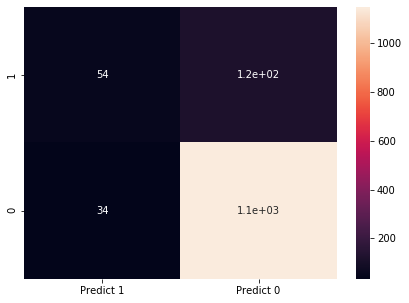

In [48]:
cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])

BankData01_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))

sns.heatmap(BankData01_cm, annot=True)

#### The Confusion Matrix

1. True Positives (TP): Correctly predicted that they have subscribed for a Term Deposit : 53

2. True Negatives (TN): Correctly predicted that they have not subscribed for a Term Deposit : 1149

3. False Positives (FP): Incorrectly predicted that they have subscribed for a Term Deposit (" Positive Type I Error"): 122

4. False Negatives (FN): Incorrectly predicted that they have not subscribed for a Term Deposi ("Negative Type II Error") : 33

#### Accuracy

1. Training Accuracy: 90.6% (0.90613147914)
2. Testing Accuracy : 88.6% (0.885777450258)

#### Precision/Recall
1. Precision = TP/(TP+FP) = 53/(53+122) = 0.30857143
2. Recall    = TP/(TP+FN) = 53/(53+33)  = 0.61363636

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.31*0.61)/(0.31 + 0.61) = 0.1891/0.92 = 0.20554348 = 0.21

### (b.) Build a Decision Tree Model

In [49]:
# Copy dataset for Decision Tree Model Evaluation

BankData02 = BankData.copy() 
BankData02.head() 
#df2 = df1.copy()

,age,job,marital,education,default,balance,housing,loan,day,month,...,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,12,2,1,0,1787,0,0,19,10,...,-1,0,0,1,0,0,0,0,0,1
1,33,9,2,2,0,4789,1,1,11,5,...,339,4,0,1,0,0,1,0,0,0
2,35,5,1,3,0,1350,1,0,16,4,...,330,1,0,1,0,0,1,0,0,0
3,30,5,2,3,0,1476,1,1,3,6,...,-1,0,0,0,0,1,0,0,0,1
4,59,2,2,2,0,0,1,0,5,5,...,-1,0,0,0,0,1,0,0,0,1


In [50]:
# Define X and Y variables
X = BankData02.drop("y", axis=1)
Y = BankData02.pop("y")

In [51]:
# Split training & test adta in a 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [52]:
# Gini for criteria

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## Score the Decision Tree

In [53]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))


1.0
0.861459100958


### Visualize the Decision Tree

In [54]:
train_char_label = ['No', 'Yes']
Bank_Tree_File = open('Bank_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_File.close()

In [55]:
# Bank_Tree_File.dot file generated/outputed by tree.export_graphviz. Text file that describing the Decision Tree graph, plotted by pasting the contents of that file at  http://webgraphviz.com/ (or)


In [56]:
# Display Decision Tree in the dot application

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng Bank_tree.dot -o Bank_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Bank_tree.png"))

system command returning error: 1


### 4.  Transforming the data i.e. scaling / normalizing as required 

### Regularize & Reducing over fitting

In [57]:
# Reduce  complexity and therefore overfitting by reducing the depth to 3 levels

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train)) # evaluate performance and testing data
print(dTreeR.score(X_test, y_test))   # evaluate performance and testing data

0.91213653603
0.884303610906


#### Observation : performance on the training and testing data is both very good at >98%

In [58]:
train_char_label = ['No', 'Yes']
Bank_Tree_FileR = open('Bank_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Bank_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_FileR.close()

# 'dot' command not working on my machine !!!
# Works only if "dot" command works on you machine                              !!!!!***REMOVE LINE***!!!!

retCode = system("dot -Tpng Bank_treeR.dot -o Bank_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))


system command returning error: 1


In [59]:
# Check features in the built decision tree that are most important (Computed features after normalization & total reduction)
#  of the criterion brought by that feature, known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                        Imp
age                0.031438
job                0.015129
marital            0.000000
education          0.000000
default            0.000000
balance            0.000000
housing            0.000000
loan               0.000000
day                0.000000
month              0.000000
duration           0.599088
campaign           0.000000
pdays              0.000000
previous           0.000000
contact_cellular   0.031776
contact_telephone  0.000000
contact_unknown    0.000000
poutcome_failure   0.000000
poutcome_other     0.000000
poutcome_success   0.322570
poutcome_unknown   0.000000


0.884303610906


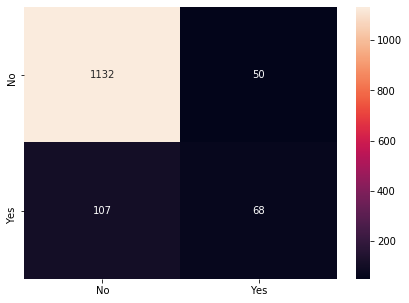

In [60]:
# Vizualise accuracy using Confusion Matrix

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Evaluation of the Confusion Matrix

Predictions
1. Did not default = 1332  [True Positives]
2. Predicted 25 (25+0) will default; 0 did not default  [False Positive]
3. Predicted 25 will default and did not  [False Negative]
4. Predicted that 0 will not defaut, and they did not  [True Negative ]

Accuracy on the test data is 98%  (0.981577008106)


#### Precision/Recall

1. Precision TP/(TP+FP) = 1
2. Recall (or Sensitivity) = TP/(TP +FN) = 1

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.31*0.61)/(0.31 + 0.61) = 0.1891/0.92 = 0.20554348 = 0.21

#### 2.	Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks).

#                             Ensemble Learning - Bagging

In [61]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, Y_train)


0.882829771555


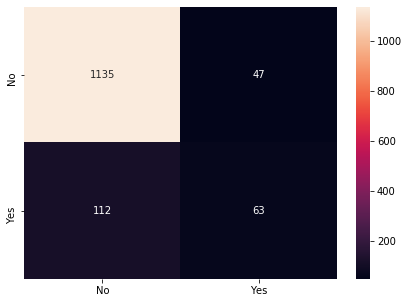

In [62]:
Y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))

cm01=metrics.confusion_matrix(Y_test, Y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm01, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#### Evaluation of the Confusion Matrix

Predictions
1. Did not default = 1135  [True Positives]
2. Predicted 47 will default; 0 did not default  [False Positive]
3. Predicted 112 will default and did not  [False Negative]
4. Predicted that 63 will not defaut, and they did not  [True Negative ]

Accuracy on the test data is  88.3%  (0.882829771555)

#### Precision/Recall

1. Precision TP/(TP+FP) = 0.96023689
2. Recall (or Sensitivity) = TP/(TP +FN) = 0.94741235

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.96*0.95)/(0.96 + 0.95) = 0.912/1.91 = 0.47748691 = 0.48

## Ensemble Learning - AdaBoosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


0.880619012528


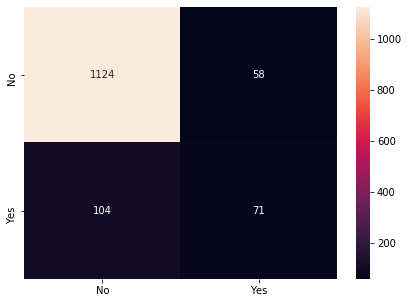

In [64]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


#### Evaluation of the Confusion Matrix

Predictions
1. Did not default = 1124  [True Positives]
2. Predicted 58 will default; 0 did not default  [False Positive]
3. Predicted 104 will default and did not  [False Negative]
4. Predicted that 71 will not defaut, and they did not  [True Negative ]

Accuracy on the test data is 88.1%  (0.0.880619012528)

#### Precision/Recall

1. Precision TP/(TP+FP) = 0.95093063
2. Recall (or Sensitivity) = TP/(TP +FN) = 0.91530945

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.95*0.92)/(0.95 + 0.92) = 0.874/1.87 = 0.46737968 = 0.47

##  Ensemble Learning - GradientBoost

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, Y_train)

0.887251289609


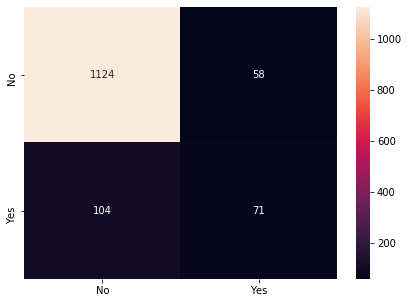

In [66]:
Y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, Y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Evaluation of the Confusion Matrix

Predictions
1. Did not default = 1124  [True Positives]
2. Predicted 58 will default; 0 did not default  [False Positive]
3. Predicted 104 will default and did not  [False Negative]
4. Predicted that 71 will not defaut, and they did not  [True Negative ]

Accuracy on the test data is 88.7%  (0.887251289609)

#### Precision/Recall

1. Precision TP/(TP+FP) = 0.95093063
2. Recall (or Sensitivity) = TP/(TP +FN) = 0.91530945

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.95*0.92)/(0.95 + 0.92) = 0.874/1.87 = 0.46737968 = 0.47

## Ensemble RandomForest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)


0.884303610906


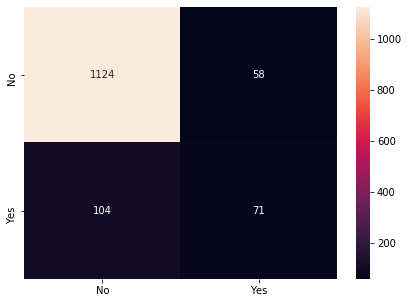

In [68]:
Y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Evaluation of the Confusion Matrix

Predictions
1. Did not default = 1124  [True Positives]
2. Predicted 58 will default; 0 did not default  [False Positive]
3. Predicted 104 will default and did not  [False Negative]
4. Predicted that 71 will not defaut, and they did not  [True Negative ]

Accuracy on the test data is 88.4%  (0.884303610906)

#### Precision/Recall

1. Precision TP/(TP+FP) = 0.95093063
2. Recall (or Sensitivity) = TP/(TP +FN) = 0.91530945

#### F1 Score 

F1 Score = 2(precision*recall)/(precision+recall)

F1 score = 2(0.95*0.91)/(0.95 + 0.91) = 0.1891/0.92 = 0.29844086 = 0.30

#### 3.	Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks).

In [70]:
# The best algorithm is  